In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'data/'

In [3]:
# data from http://www.fao.org/faostat/en/?#data/PP

In [50]:
meat_price_europe_path = path + 'Prices_E_Europe/Prices_E_Europe_NOFLAG.csv'
meat_price_europe = pd.read_csv(meat_price_europe_path)

In [91]:
# meat_price_europe.Item.unique()

In [52]:
# Filter with meats only
meat_price_europe = meat_price_europe[meat_price_europe.Item.str.startswith('Meat')]

In [53]:
# drop if all the elements of the column in NaN
meat_price_europe = meat_price_europe.dropna(axis=1, how='all')

In [54]:
# TODO: Choose between producer price LCU/tonne, SLC/tonne, USD/tonne (chosen actually USD/tonne)
meat_price_europe = meat_price_europe[meat_price_europe.Unit.str.contains('USD')]

In [55]:
# element code contains only 5532 as value, so we can remove it (information not needed)
# same for Element, Unit that has been selected
meat_price_europe = meat_price_europe.drop(columns = ['Element Code','Unit', 'Element'])

In [56]:
swiss_meat = meat_price_europe[  (meat_price_europe['Area'] == 'Switzerland')].copy()

In [70]:
swiss_chicken_price_only_years_columns = swiss_meat[swiss_meat['Item Code'] == 1095].drop(columns= ['Item','Area Code', 'Area', 'Item Code' ])

In [80]:
swiss_chicken_price_only_years_columns.columns = range(1991, 2019)

In [81]:
swiss_chicken_price_only_years_columns

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
6727,NaN,NaN,NaN,NaN,2686.8,2316.3,1918.3,1896.8,1776.8,1568.5,...,2325.1,2347.3,2727.3,2588.3,2661.5,2684.1,2525.0,2431.5,2457.5,2438.9


In [86]:
transposed = swiss_chicken_price_only_years_columns.T

In [88]:
transposed.columns = ['price in USD/tonne']

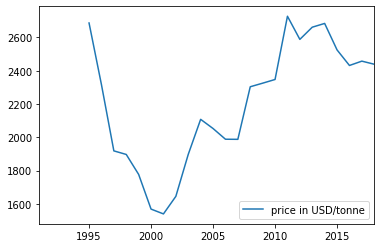

In [90]:
transposed.plot()

In [117]:
# https://data.oecd.org/agroutput/meat-consumption.htm
meat_consumption_path = path + 'DP_LIVE_23112019095726322.csv'
meat_consumption = pd.read_csv(meat_consumption_path)

In [118]:
# column INDICATOR contains only 'MEATCONSUMP', so we can remove it
# column Flag Codes contains only NaN, so we can remove it
# same for FREQUENCY (only A's)
meat_consumption = meat_consumption.drop(columns = ['INDICATOR', 'Flag Codes', 'FREQUENCY'])

In [119]:
meat_consumption.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,BEEF,KG_CAP,1990,0.000004
1,AUS,BEEF,KG_CAP,1991,27.808401
2,AUS,BEEF,KG_CAP,1992,26.278166
3,AUS,BEEF,KG_CAP,1993,26.244478
4,AUS,BEEF,KG_CAP,1994,25.541244


In [120]:
meat_consumption.SUBJECT.unique()

array(['BEEF', 'PIG', 'POULTRY', 'SHEEP'], dtype=object)

In [121]:
meat_consumption.LOCATION.unique()

array(['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'ARG',
       'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'IND', 'IDN', 'IRN',
       'ISR', 'KAZ', 'MYS', 'NGA', 'PAK', 'PRY', 'PER', 'PHL', 'RUS',
       'SAU', 'ZAF', 'THA', 'UKR', 'VNM', 'WLD', 'EU27', 'OECD', 'BRICS',
       'NOR', 'CHE', 'GBR'], dtype=object)

In [122]:
# We are interested for now in European consumption only
meat_consumption = meat_consumption[meat_consumption['LOCATION'] == 'EU27']
# we can now remove LOCATION column (since we have only EU27)
meat_consumption = meat_consumption.drop(columns = ['LOCATION'])

In [123]:
meat_consumption.head()

,SUBJECT,MEASURE,TIME,Value
5120,BEEF,KG_CAP,1990,1.665881e-07
5121,BEEF,KG_CAP,1991,1.660957e-07
5122,BEEF,KG_CAP,1992,1.656066e-07
5123,BEEF,KG_CAP,1993,1.651448e-07
5124,BEEF,KG_CAP,1994,1.647415e-07


In [124]:
meat_consumption_poultry = meat_consumption[meat_consumption['SUBJECT'] == 'POULTRY']
meat_consumption_poultry = meat_consumption.drop(columns = ['SUBJECT'])

In [125]:
meat_consumption_poultry.MEASURE.unique()

array(['KG_CAP', 'THND_TONNE'], dtype=object)

In [127]:
meat_consumption_poultry.head()

,MEASURE,TIME,Value
5120,KG_CAP,1990,1.665881e-07
5121,KG_CAP,1991,1.660957e-07
5122,KG_CAP,1992,1.656066e-07
5123,KG_CAP,1993,1.651448e-07
5124,KG_CAP,1994,1.647415e-07


In [128]:
# choose THND_TONNE (had to choose between KG_CAP and THND_TONNE)
meat_consumption_poultry = meat_consumption_poultry[meat_consumption_poultry['MEASURE'] == 'THND_TONNE'].drop(columns = ['MEASURE'])

In [154]:
range_years = meat_consumption_poultry.TIME

In [155]:
meat_consumption_poultry_only_years = meat_consumption_poultry.drop(columns = ['TIME'])
meat_consumption_poultry_only_years.columns = ['Consumption of poultry of Europe in THND_TONNE']
meat_consumption_poultry_only_years = meat_consumption_poultry_only_years.T
meat_consumption_poultry_only_years.columns = range_years

In [156]:
meat_consumption_poultry_only_years

TIME,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
Consumption of poultry of Europe in THND_TONNE,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,701.700758,708.116261,713.002977,718.27844,725.136237,732.149998,737.008238,741.104095,743.489549,747.011872


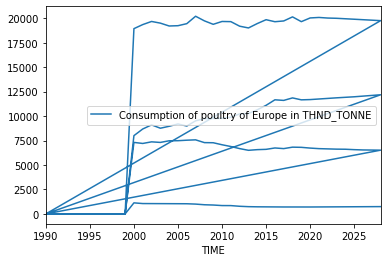

In [158]:
meat_consumption_poultry_only_years.T.plot()

In [159]:
meat_consumption_poultry_only_years

TIME,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
Consumption of poultry of Europe in THND_TONNE,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,701.700758,708.116261,713.002977,718.27844,725.136237,732.149998,737.008238,741.104095,743.489549,747.011872


In [168]:
import plotly.express as px

In [169]:
color='country'

In [171]:
gapminder = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(gapminder, x="year", y="lifeExp", color='country')
fig.show()